<a href="https://colab.research.google.com/github/Khaled-Mohammed-Abdelgaber/deep-learning-projects-/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#use tensorflow apis to bring datasets 'fashion_mnist' represent name of dataset and we take train partion only 
ds = tfds.load('fashion_mnist',split = 'train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteESL455/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteESL455/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
ds

<PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [4]:
ds.as_numpy_iterator().next().keys()#deal tf dataset as dictionary consist of two keys label and images

dict_keys(['image', 'label'])

In [ ]:
ds.as_numpy_iterator().next()['image']

In [6]:
dataiterator = ds.as_numpy_iterator() #setting up connection also known as iterator

In [7]:
#getting data out of pipeline
dataiterator.next()['image'].shape

(28, 28, 1)

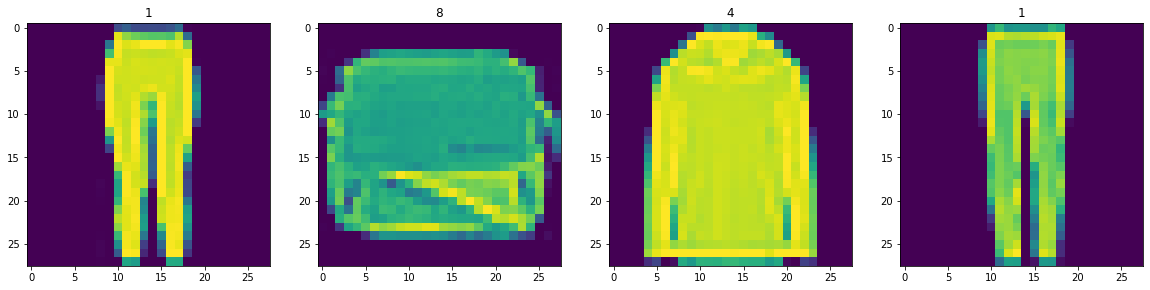

In [8]:
#setup subplot formating 
fig, ax = plt.subplots(ncols = 4 , figsize = (20,20))
for idx in range(4):
  sample = dataiterator.next()
  ax[idx].imshow(np.squeeze(sample['image']))
  ax[idx].title.set_text(str(sample['label']))

In [9]:
def scale_image(data):
  image = data['image']
  return image/255

In [10]:
ds = tfds.load('fashion_mnist',split = 'train')
ds = ds.map(scale_image)
ds = ds.cache()
ds = ds.shuffle(60000)
ds = ds.batch(128)
ds = ds.prefetch(64)

In [11]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LeakyReLU , Reshape , UpSampling2D , Conv2D,Dropout,Flatten

In [13]:
def build_generator():
  model = Sequential()
  #beginnig of generated image
  model.add(Dense(7*7*128,input_dim = 128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))

  #Upsampling block
  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding = 'same'))
  model.add(LeakyReLU(0.2))

  #convolution block 1
  model.add(UpSampling2D())
  model.add(Conv2D(128,4,padding = 'same'))
  model.add(LeakyReLU(0.2))

  #convolution block 2
  model.add(Conv2D(128,4,padding = 'same'))
  model.add(LeakyReLU(0.2))
  
  #Conv layer to get to one channel
  model.add(Conv2D(1,4,padding = 'same',activation = 'sigmoid'))

  return model



In [14]:
generator = build_generator()

In [15]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

1/1 [==============================] - 7s 7s/step


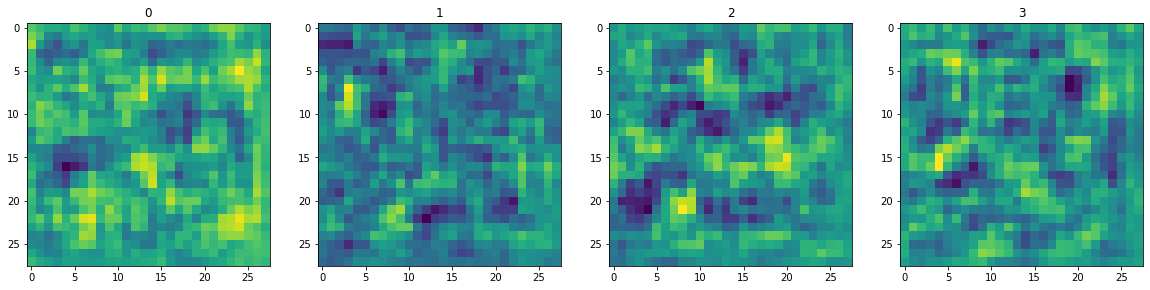

In [16]:
#generate new fashion
imgs = generator.predict(np.random.randn(4,128,1))
fig,ax = plt.subplots(ncols = 4 , figsize = (20,20))
for idx , img  in enumerate(imgs):
  # plot the image using specific subplot
  ax[idx].imshow(np.squeeze(img))
  # show image index as it title
  ax[idx].title.set_text(idx)

In [17]:
def build_discriminator():
  model = Sequential()
  #first convolution block
  model.add(Conv2D(32,5,input_shape = (28,28,1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(64,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(128,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(256,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1,activation = 'sigmoid'))

  return model

In [18]:
discriminator = build_discriminator()

In [19]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 128)      

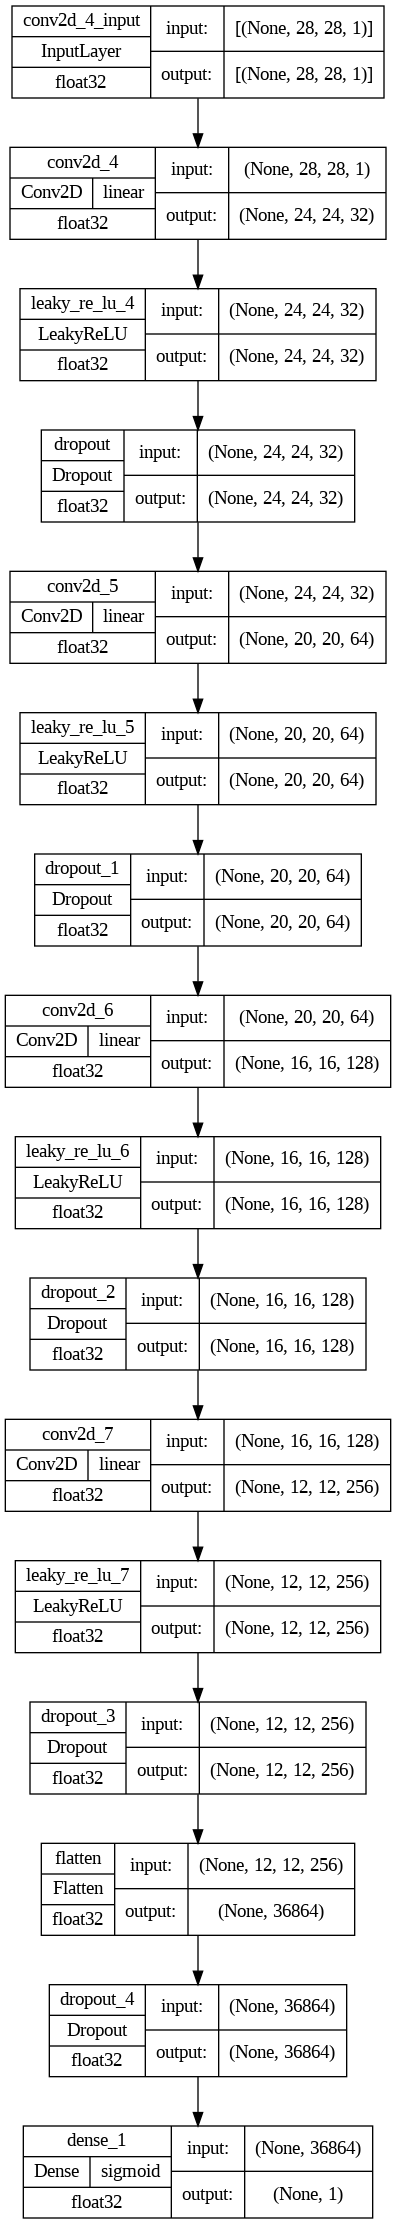

In [20]:
tf.keras.utils.plot_model(
    discriminator,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)

In [21]:
imgs.shape

(4, 28, 28, 1)

In [22]:
discriminator.predict(imgs[0].reshape(1,28,28,1))

1/1 [==============================] - 0s 149ms/step


array([[0.49990568]], dtype=float32)

In [23]:
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.losses import BinaryCrossentropy

In [24]:
gen_opt = Adam(learning_rate=0.0001)
dis_opt = Adam(learning_rate = 0.00001)
gen_loss = BinaryCrossentropy()
dis_loss = BinaryCrossentropy()

In [25]:
from tensorflow.keras.models import Model

In [26]:
class FashionGAN(Model):
  def __init__(self , generator , discriminator,*args,**kwargs):
    #pass args and kwargs to base class
    super().__init__(*args , **kwargs)

    #Create attributes for gen and disc
    self.generator = generator
    self.discriminator = discriminator

  def compile(self,g_opt,d_opt,g_loss , d_loss , *args,**kwargs):
    super().compile(*args,**kwargs)
    self.g_opt = g_opt
    self.d_opt = d_opt
    self.g_loss = g_loss
    self.d_loss = d_loss
  
  def train_step(self,batch):
    #Get the data
    real_images = batch 
    fake_images = self.generator(tf.random.normal((128,128,1)),training = False)

    with tf.GradientTape() as d_tape:
      yhat_real = self.discriminator(real_images,training = True)
      yhat_fake = self.discriminator(fake_images , training = True)
      yhat_real_fake = tf.concat([yhat_real,yhat_fake],axis = 0)

      #create labels for fake and real images
      y_real_fake = tf.concat([tf.zeros_like(yhat_real) , tf.ones_like(yhat_fake)],axis = 0)

      #add some noise to True outputs
      noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
      noise_fake = -0.15 * tf.random.uniform(tf.shape(yhat_fake))
      
      y_real_fake += tf.concat([noise_real , noise_fake],axis = 0)

      #calculate total loss - using discriminator loss function
      total_d_loss = self.d_loss(y_real_fake , yhat_real_fake)

    #apply backpropagation - nn learn
    dgrad = d_tape.gradient(total_d_loss , self.discriminator.trainable_variables)
    self.d_opt.apply_gradients(zip(dgrad,self.discriminator.trainable_variables))

    #train the generator

    with tf.GradientTape() as g_tape:
      g_images = self.generator(tf.random.normal((128,128,1)),training = True)
      pred_labels = self.discriminator(g_images,training = False)

      totat_g_loss = self.g_loss(pred_labels , tf.zeros_like(pred_labels))

    ggrad = g_tape.gradient(totat_g_loss , self.generator.trainable_variables)
    self.g_opt.apply_gradients(zip(ggrad , self.generator.trainable_variables))

    return {"d_loss": total_d_loss , "g_loss":totat_g_loss}

In [27]:
fashgan = FashionGAN(generator , discriminator)

In [28]:
fashgan.compile(gen_opt,dis_opt,gen_loss , dis_loss)

In [29]:
import os 
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [36]:
class ModelMonitor(Callback):
  def __init__(self , num_img = 3 , latent_dim = 128):
    self.num_img = num_img
    self.latent_dim = latent_dim

  def on_epoch_end(self,epoch,logs = None):
    random_latent_vectors = tf.random.normal((self.num_img , self.latent_dim,1))
    generated_images = self.model.generator(random_latent_vectors)
    generated_images *=255
    generated_images.numpy()
    for i in range(self.num_img):
      img = array_to_img(generated_images[i])
      img.save(os.path.join('/content/sample_data/images',f'generated_image{epoch}_{i}.png'))

In [37]:
hist = fashgan.fit(ds, epochs=20, callbacks=[ModelMonitor()])

Epoch 1/20
  6/469 [..............................] - ETA: 1:01 - d_loss: 0.2762 - g_loss: 14.4050

469/469 [==============================] - 62s 133ms/step - d_loss: 0.2744 - g_loss: 14.4290
Epoch 2/20
469/469 [==============================] - 61s 130ms/step - d_loss: 0.2846 - g_loss: 14.4487
Epoch 3/20
469/469 [==============================] - 63s 133ms/step - d_loss: 0.6153 - g_loss: 9.1768
Epoch 4/20
469/469 [==============================] - 61s 130ms/step - d_loss: 0.6301 - g_loss: 5.2931
Epoch 5/20
469/469 [==============================] - 61s 131ms/step - d_loss: 0.7213 - g_loss: 5.8495
Epoch 6/20
469/469 [==============================] - 63s 133ms/step - d_loss: 0.6934 - g_loss: 7.0903
Epoch 7/20
469/469 [==============================] - 62s 133ms/step - d_loss: 0.6925 - g_loss: 7.2076
Epoch 8/20
469/469 [==============================] - 62s 133ms/step - d_loss: 0.6948 - g_loss: 7.2015
Epoch 9/20
469/469 [==============================] - 61s 130ms/step - d_loss: 0.6956 - g_loss: 7.3200
Epoch 10/20
469/469 [==============================] - 61s 131ms/step - d_loss: 0.

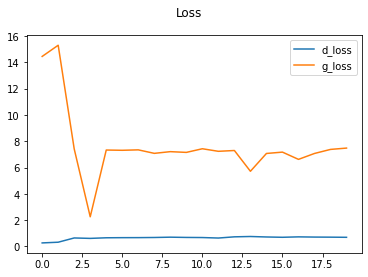

In [38]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()
plt.show()

In [39]:
imgs = generator.predict(tf.random.normal((16, 128, 1)))

1/1 [==============================] - 0s 194ms/step


In [42]:
imgs.shape

(16, 28, 28, 1)

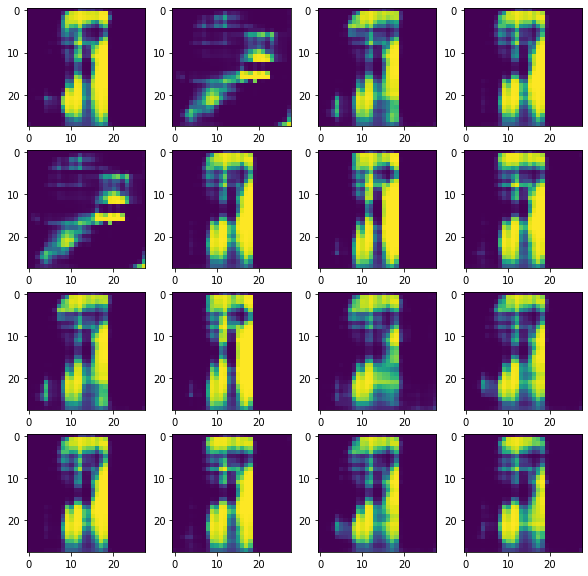

In [43]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10,10))
imgs = np.squeeze(imgs)
for r in range(4): 
    for c in range(4): 
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])